In [30]:
from pymongo import MongoClient
from data_f import *
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import matplotlib


%matplotlib inline

In [31]:
first_name = first_name()
last_name = last_name()
usernames = username()
sex = sex()
age = age()
followers = followers()
follows = follows()
media = media()
likes = likes()
comments = comments()
age_classificator = age_classification()

In [32]:
features_dataset = pd.DataFrame(zip(followers, follows, media, 
                                    likes, comments))
training_size = 0.7

features_train = features_dataset[:int(0.7*len(features_dataset))]
features_test = features_dataset[int(0.7*len(features_dataset)):]

labels_train = age_classificator[:int(0.7*len(features_dataset))]
labels_test = age_classificator[int(0.7*len(features_dataset)):]


# Decision Trees 

In [33]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


model.fit(features_train, labels_train)

#print(model)

print(metrics.classification_report(labels_test, model.predict(features_test)))
print(metrics.confusion_matrix(labels_test, model.predict(features_test)))

             precision    recall  f1-score   support

        1.0       0.16      0.25      0.19        57
        2.0       0.77      0.73      0.75       405
        3.0       0.23      0.21      0.22        67
        4.0       0.00      0.00      0.00         7

avg / total       0.63      0.61      0.62       536

[[ 14  40   3   0]
 [ 66 297  41   1]
 [  7  45  14   1]
 [  1   4   2   0]]


# Linear Regression 

[ 20.81913069  20.5450796   20.33040344 ...,  20.92796437  21.79371319
  20.95120937]


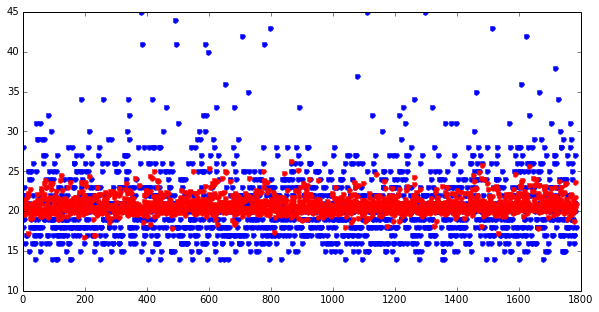

,Coef,Feature
0,-0.000754,Followers
1,0.000076,Followings
2,0.005210,Medias
3,-0.010609,Average likes
4,0.545989,Average comments


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

model = LinearRegression()

dataset = pd.DataFrame(zip(first_name, last_name, age, age_classificator, sex, followers, follows,
                           media, likes, comments), 
                       columns = ["First name", "Last Name", "Age", "Age class",
                                  "Sex", "Followers", "Follows", "Medias", 
                                  "Average likes", "Averege comments"])

features_dataset = pd.DataFrame(zip(followers, follows, media, 
                                    likes, comments))


model.fit(features_dataset, dataset["Age"])

print model.predict(features_dataset)

coefficients = pd.DataFrame(zip(model.coef_, ["Followers", "Followings", "Medias", "Average likes", 
                                           "Average comments"]), 
                                columns = ["Coef", "Feature"])
#predicted = model.predict(features_dataset)

plt.plot(dataset.Age, 'b.', markersize = 10)
plt.plot(model.predict(features_dataset), 'r.', markersize = 10)
plt.show()
               
coefficients    

# GBRT

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

dataset = pd.DataFrame(zip(first_name, last_name, age, age_classificator, sex, followers, follows, media, likes, comments), 
                       columns = ["First name", "Last Name", "Age", "Age class", "Sex", "Followers", "Follows", "Medias",
                                  "Average likes", "Averege comments"])

features_dataset = pd.DataFrame(zip(followers, follows, media, 
                                    likes, comments))


model.fit(features_dataset, dataset["Age class"])
 
print(model)    

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
